In [44]:
%config Completer.use_jedi = False

In [87]:
import pandas as pd
import tqdm
import re

from konlpy.corpus import kolaw
from konlpy.tag import Okt, Hannanum, Kkma, Komoran, Twitter, Mecab
import MeCab
from konlpy.utils import concordance, pprint

import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('novel_story_sep.csv', lineterminator='\n')

---

# 형태소 분리

In [30]:
text = df['story'][20]
text[:100]

'고통스럽게 되살려낸 5월 광주한국인 최초 맨부커상 수상작가 한강의 여섯 번째 장편소설 『소년이 온다』. 1980년 5월 18일부터 열흘간 있었던 광주민주화운동 당시의 상황과 그 이'

## 1. Okt

In [40]:
okt = Okt()
story_okt = okt.pos(text)
story_okt[:50]

[('고통', 'Noun'),
 ('스럽게', 'Josa'),
 ('되살려', 'Verb'),
 ('낸', 'Verb'),
 ('5월', 'Number'),
 ('광주', 'Noun'),
 ('한국인', 'Noun'),
 ('최초', 'Noun'),
 ('맨부커상', 'Noun'),
 ('수상작', 'Noun'),
 ('가', 'Josa'),
 ('한강', 'Noun'),
 ('의', 'Josa'),
 ('여섯', 'Noun'),
 ('번째', 'Suffix'),
 ('장편소설', 'Noun'),
 ('『', 'Foreign'),
 ('소년', 'Noun'),
 ('이', 'Josa'),
 ('온다', 'Verb'),
 ('』', 'Foreign'),
 ('.', 'Punctuation'),
 ('1980년', 'Number'),
 ('5월', 'Number'),
 ('18일', 'Number'),
 ('부터', 'Foreign'),
 ('열흘', 'Noun'),
 ('간', 'Suffix'),
 ('있었던', 'Adjective'),
 ('광주', 'Noun'),
 ('민주화', 'Noun'),
 ('운동', 'Noun'),
 ('당시', 'Noun'),
 ('의', 'Josa'),
 ('상황', 'Noun'),
 ('과', 'Josa'),
 ('그', 'Noun'),
 ('이후', 'Noun'),
 ('남겨진', 'Verb'),
 ('사람', 'Noun'),
 ('들', 'Suffix'),
 ('의', 'Josa'),
 ('이야기', 'Noun'),
 ('를', 'Josa'),
 ('들려주는', 'Verb'),
 ('소설', 'Noun'),
 ('이다', 'Josa'),
 ('.', 'Punctuation'),
 ('2013년', 'Number'),
 ('11월', 'Number')]

## 2. Hannanum

In [32]:
hannanum = Hannanum()
story_hannanum = hannanum.pos(text)
story_hannanum[:50]

[('고통', 'N'),
 ('스럽', 'X'),
 ('게', 'E'),
 ('되살리', 'P'),
 ('어', 'E'),
 ('내', 'P'),
 ('ㄴ', 'E'),
 ('5월', 'N'),
 ('광주한국', 'N'),
 ('이', 'J'),
 ('ㄴ', 'E'),
 ('최초', 'N'),
 ('맨부커상', 'N'),
 ('수상작', 'N'),
 ('가', 'J'),
 ('한강', 'N'),
 ('의', 'J'),
 ('여섯', 'N'),
 ('번', 'N'),
 ('째', 'X'),
 ('장편소설', 'N'),
 ('『소년', 'N'),
 ('이', 'J'),
 ('온다』', 'N'),
 ('.', 'S'),
 ('1980년', 'N'),
 ('5월', 'N'),
 ('18일', 'N'),
 ('부터', 'J'),
 ('열흘간', 'N'),
 ('있', 'P'),
 ('었던', 'E'),
 ('광주민주화운동', 'N'),
 ('당시', 'N'),
 ('의', 'J'),
 ('상황', 'N'),
 ('과', 'J'),
 ('그', 'M'),
 ('이후', 'N'),
 ('남기', 'P'),
 ('어', 'E'),
 ('지', 'P'),
 ('ㄴ', 'E'),
 ('사람', 'N'),
 ('들', 'X'),
 ('의', 'J'),
 ('이야기', 'N'),
 ('를', 'J'),
 ('들리', 'P'),
 ('어', 'E')]

## 3. Kkma

In [33]:
kkma = Kkma()
story_kkma = kkma.pos(text)
story_kkma[:50]

[('고통', 'NNG'),
 ('스럽', 'XSA'),
 ('게', 'ECD'),
 ('되살', 'VV'),
 ('려', 'ECD'),
 ('내', 'VXV'),
 ('ㄴ', 'ETD'),
 ('5', 'NR'),
 ('월', 'NNM'),
 ('광주', 'NNG'),
 ('한국인', 'NNG'),
 ('최초', 'NNG'),
 ('맨', 'MDT'),
 ('부', 'NNG'),
 ('커', 'VV'),
 ('어', 'ECS'),
 ('상', 'NNG'),
 ('수상', 'NNG'),
 ('작가', 'NNG'),
 ('한강', 'NNP'),
 ('의', 'JKG'),
 ('여섯', 'NR'),
 ('번째', 'NNB'),
 ('장편', 'NNG'),
 ('소설', 'NNG'),
 ('『', 'SS'),
 ('소년', 'NNG'),
 ('이', 'JKS'),
 ('오', 'VV'),
 ('ㄴ다', 'ECS'),
 ('』', 'SS'),
 ('.', 'SF'),
 ('1980', 'NR'),
 ('년', 'NNM'),
 ('5', 'NR'),
 ('월', 'NNM'),
 ('18', 'NR'),
 ('일', 'NNM'),
 ('부터', 'JX'),
 ('열흘', 'NNG'),
 ('간', 'NNB'),
 ('있', 'VV'),
 ('었', 'EPT'),
 ('더', 'EPT'),
 ('ㄴ', 'ETD'),
 ('광', 'NNG'),
 ('주민', 'NNG'),
 ('주화', 'NNG'),
 ('운동', 'NNG'),
 ('당시', 'NNG')]

## 4. Komoran

In [34]:
komoran = Komoran()
story_komoran = komoran.pos(text)
story_komoran[:50]

[('고통', 'NNG'),
 ('스럽', 'XSA'),
 ('게', 'EC'),
 ('되살리', 'VV'),
 ('어', 'EC'),
 ('내', 'VX'),
 ('ㄴ', 'ETM'),
 ('5월', 'NNP'),
 ('광주', 'NNP'),
 ('한국인', 'NNP'),
 ('최초', 'NNG'),
 ('맨', 'XPN'),
 ('부', 'NNG'),
 ('크', 'VA'),
 ('어', 'EC'),
 ('상', 'XSN'),
 ('수상', 'NNP'),
 ('작가', 'NNP'),
 ('한강', 'NNP'),
 ('의', 'JKG'),
 ('여섯', 'NR'),
 ('번', 'NNB'),
 ('째', 'XSN'),
 ('장편소설', 'NNP'),
 ('『', 'SS'),
 ('소년이 온다', 'NNP'),
 ('』', 'SS'),
 ('.', 'SF'),
 ('1980', 'SN'),
 ('년', 'NNB'),
 ('5월 18일', 'NNP'),
 ('부터', 'JX'),
 ('열흘', 'NNG'),
 ('간', 'NNB'),
 ('있', 'VX'),
 ('었', 'EP'),
 ('던', 'ETM'),
 ('광주민주화운동', 'NNP'),
 ('당시', 'NNG'),
 ('의', 'JKG'),
 ('상황', 'NNG'),
 ('과', 'JC'),
 ('그', 'MM'),
 ('이후', 'NNG'),
 ('남기', 'VV'),
 ('어', 'EC'),
 ('지', 'VX'),
 ('ㄴ', 'ETM'),
 ('사람', 'NNG'),
 ('들', 'XSN')]

## 5. Twitter

In [35]:
twitter = Twitter()
story_twitter = twitter.pos(text)
story_twitter[:50]

[('고통', 'Noun'),
 ('스럽게', 'Josa'),
 ('되살려', 'Verb'),
 ('낸', 'Verb'),
 ('5월', 'Number'),
 ('광주', 'Noun'),
 ('한국인', 'Noun'),
 ('최초', 'Noun'),
 ('맨부커상', 'Noun'),
 ('수상작', 'Noun'),
 ('가', 'Josa'),
 ('한강', 'Noun'),
 ('의', 'Josa'),
 ('여섯', 'Noun'),
 ('번째', 'Suffix'),
 ('장편소설', 'Noun'),
 ('『', 'Foreign'),
 ('소년', 'Noun'),
 ('이', 'Josa'),
 ('온다', 'Verb'),
 ('』', 'Foreign'),
 ('.', 'Punctuation'),
 ('1980년', 'Number'),
 ('5월', 'Number'),
 ('18일', 'Number'),
 ('부터', 'Foreign'),
 ('열흘', 'Noun'),
 ('간', 'Suffix'),
 ('있었던', 'Adjective'),
 ('광주', 'Noun'),
 ('민주화', 'Noun'),
 ('운동', 'Noun'),
 ('당시', 'Noun'),
 ('의', 'Josa'),
 ('상황', 'Noun'),
 ('과', 'Josa'),
 ('그', 'Noun'),
 ('이후', 'Noun'),
 ('남겨진', 'Verb'),
 ('사람', 'Noun'),
 ('들', 'Suffix'),
 ('의', 'Josa'),
 ('이야기', 'Noun'),
 ('를', 'Josa'),
 ('들려주는', 'Verb'),
 ('소설', 'Noun'),
 ('이다', 'Josa'),
 ('.', 'Punctuation'),
 ('2013년', 'Number'),
 ('11월', 'Number')]

## 6. MeCab

In [36]:
mecab = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ko-dic')

In [38]:
print(mecab.parse(df['story'][20])[:500])

고통	NNG,정적사태,T,고통,*,*,*,*
스럽	XSA,*,T,스럽,*,*,*,*
게	EC,*,F,게,*,*,*,*
되살려	VV+EC,*,F,되살려,Inflect,VV,EC,되살리/VV/*+어/EC/*
낸	VX+ETM,*,T,낸,Inflect,VX,ETM,내/VX/*+ᆫ/ETM/*
5	SN,*,*,*,*,*,*,*
월	NNBC,*,T,월,*,*,*,*
광주	NNP,지명,F,광주,*,*,*,*
한국인	NNG,*,T,한국인,Compound,*,*,한국/NNG/*+인/NNG/*
최초	NNG,*,F,최초,*,*,*,*
맨	MM,~공간명사,T,맨,*,*,*,*
부커	NNP,인명,F,부커,*,*,*,*
상	XSN,*,T,상,*,*,*,*
수상	NNG,*,T,수상,*,*,*,*
작가	NNG,*,F,작가,*,*,*,*
한강	NNP,인명,T,한강,*,*,*,*
의	JKG,*,F,의,*,*,*,*
여섯	NR,*,T,여섯,*,*,*,*
번	NNBC,*,T,번,*,*,*,*
째	XSN,*,F,째,*,*


---

### Okt로 형태소 분리

In [41]:
story = df['story']

In [62]:
all_words = []
for s in story:
    okt = Okt()
    story_sep = okt.pos(s)
    all_words.append(list(story_sep))
len(all_words)

1000

In [63]:
all_words

[[('어디', 'Noun'),
  ('에도', 'Josa'),
  ('속', 'Noun'),
  ('하지', 'Verb'),
  ('못', 'VerbPrefix'),
  ('했던', 'Verb'),
  ('자이니치', 'Noun'),
  ('들', 'Suffix'),
  ('의', 'Josa'),
  ('분노', 'Noun'),
  ('와', 'Josa'),
  ('슬픔', 'Noun'),
  ('에서', 'Josa'),
  ('탄생', 'Noun'),
  ('한', 'Josa'),
  ('대작', 'Noun'),
  ('!', 'Punctuation'),
  ('한국', 'Noun'),
  ('계', 'Suffix'),
  ('1.5', 'Number'),
  ('세인', 'Noun'),
  ('미국', 'Noun'),
  ('작가', 'Noun'),
  ('이민', 'Noun'),
  ('진의', 'Noun'),
  ('장편소설', 'Noun'),
  ('『', 'Foreign'),
  ('파친코', 'Noun'),
  ('』', 'Foreign'),
  ('제', 'Noun'),
  ('1', 'Number'),
  ('권', 'Noun'),
  ('.', 'Punctuation'),
  ('내', 'Determiner'),
  ('국', 'Noun'),
  ('인', 'Josa'),
  ('이', 'Determiner'),
  ('면서', 'Noun'),
  ('끝내', 'Noun'),
  ('이방인', 'Noun'),
  ('일', 'Noun'),
  ('수', 'Noun'),
  ('밖에', 'Josa'),
  ('없었던', 'Adjective'),
  ('자이니치', 'Noun'),
  ('(', 'Punctuation'),
  ('재일동포', 'Noun'),
  (')', 'Punctuation'),
  ('들의', 'Verb'),
  ('처절한', 'Adjective'),
  ('생애', 'Noun'),
  ('를', 'Josa'),
  ('

In [72]:
necessary_words = []
necessary_type = ('Noun', 'Verb', 'Adjective')
for idx, all_word in enumerate(all_words):
    for word,typ in all_word:
        if typ in necessary_type:
            necessary_words.append([idx, word, typ])
len(necessary_words)

151247

In [74]:
necessary_words[0]

[0, '어디', 'Noun']

In [77]:
words_df = pd.DataFrame(data = necessary_words, columns=['docNo', 'word', 'type'])

In [78]:
words_df

docNo  word  type
0           0    어디  Noun
1           0     속  Noun
2           0    하지  Verb
3           0    했던  Verb
4           0  자이니치  Noun
...       ...   ...   ...
151242    999  넓히려는  Verb
151243    999    독자  Noun
151244    999    도움  Noun
151245    999     될  Verb
151246    999     것  Noun

[151247 rows x 3 columns]

---

### 형태소 분리한 데이터 살펴보기

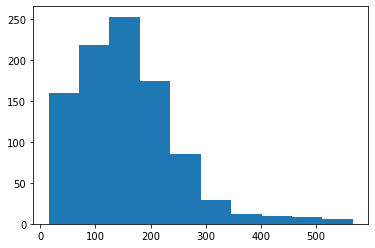

In [88]:
plt.hist(words_df.value_counts('docNo'))
plt.show()                    